In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
xytick_font = 18
xylabel_font = 24
legend_font = 16
figsize = (9, 6)

In [4]:
rgb_pssim_path = "/datassd/pipeline/client_tiled/ablation/170307_dance5_with_ground/3D_pssim_170307_dance5_with_ground_d_bgra_tracep1_log0.csv"

yuv_unscaled_path = "/datassd/pipeline/client_tiled/ablation/170307_dance5_with_ground/3D_pssim_170307_dance5_with_ground_d_yuv_unscaled_tracep1_log0.csv"

yuv_scaled_path = "/datassd/pipeline/client_tiled/ablation/170307_dance5_with_ground/3D_pssim_170307_dance5_with_ground_d_yuv_scaled_tracep1_log0.csv"

In [5]:
df_rgb = pd.read_csv(rgb_pssim_path)
df_yuv_unscaled = pd.read_csv(yuv_unscaled_path)
df_yuv_scaled = pd.read_csv(yuv_scaled_path)

In [6]:
df_rgb

,Frame,PSSIM_GEO_AB,AVG_PSSIM_GEO_AB,PSSIM_GEO_BA,AVG_PSSIM_GEO_BA,PSSIM_COLOR_AB,AVG_PSSIM_COLOR_AB,PSSIM_COLOR_BA,AVG_PSSIM_COLOR_BA
0,100,75.30,75.30,28.52,28.52,90.62,90.62,31.67,31.67
1,200,73.06,74.18,9.93,19.23,86.28,88.45,10.73,21.20
2,300,73.10,73.82,4.74,14.40,83.96,86.95,5.01,15.80
3,400,73.31,73.69,14.31,14.37,88.92,87.44,16.04,15.86
4,500,75.11,73.98,13.21,14.14,89.46,87.85,14.57,15.61
...,...,...,...,...,...,...,...,...,...
88,9500,73.09,73.66,14.05,19.26,75.36,60.11,14.86,16.97
89,9600,68.01,73.60,3.62,19.09,51.30,60.01,5.79,16.85
90,9700,73.44,73.60,14.80,19.04,69.53,60.12,15.28,16.83
91,9800,71.65,73.58,18.35,19.03,89.18,60.43,20.72,16.87


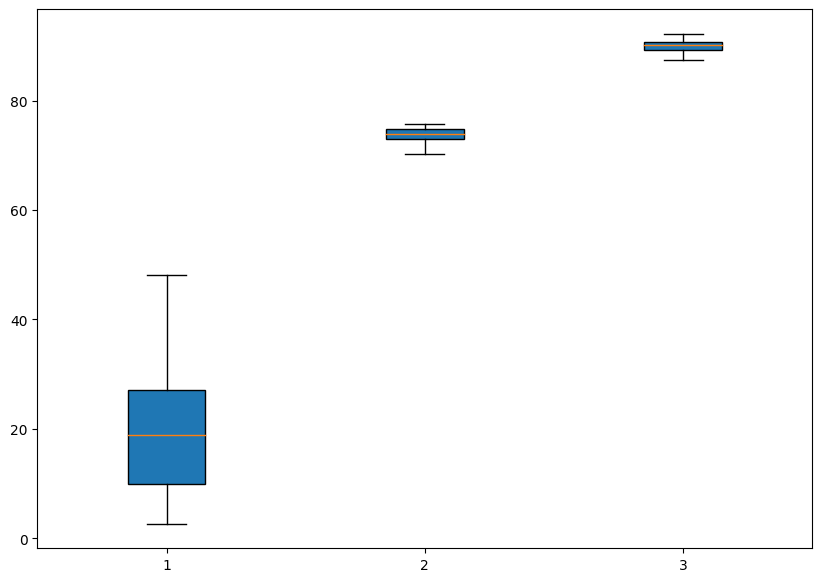

In [ ]:
# Box plot of RGB, YUV unscaled and YUV scaled

labels = ["RGB", "YUV unscaled", "YUV scaled"]
data = [
    df_rgb["PSSIM_GEO_BA"],
    df_yuv_unscaled["PSSIM_GEO_BA"],
    df_yuv_scaled["PSSIM_GEO_BA"],
]
fig = plt.figure(figsize=(10, 7))
plt.boxplot(data, patch_artist=True, showfliers=False)
plt.show()

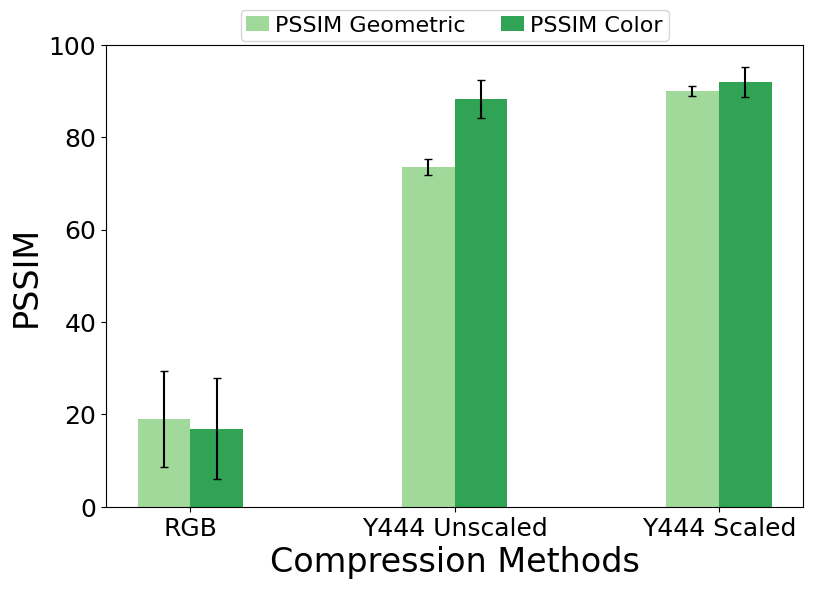

In [8]:
# Bar plot of RGB, YUV unscaled and YUV scaled

labels = ["RGB", "Y444 Unscaled", "Y444 Scaled"]
# rects = ax.bar(x + offset, measurement, width, label=attribute, yerr=method_std[attribute])
data_pssim_geo_mean = [
    df_rgb["PSSIM_GEO_BA"].mean(),
    df_yuv_unscaled["PSSIM_GEO_BA"].mean(),
    df_yuv_scaled["PSSIM_GEO_BA"].mean(),
]
data_pssim_geo_std = [
    df_rgb["PSSIM_GEO_BA"].std(),
    df_yuv_unscaled["PSSIM_GEO_BA"].std(),
    df_yuv_scaled["PSSIM_GEO_BA"].std(),
]

data_pssim_color_mean = [
    df_rgb["PSSIM_COLOR_BA"].mean(),
    df_yuv_unscaled["PSSIM_COLOR_BA"].mean(),
    df_yuv_scaled["PSSIM_COLOR_BA"].mean(),
]
data_pssim_color_std = [
    df_rgb["PSSIM_COLOR_BA"].std(),
    df_yuv_unscaled["PSSIM_COLOR_BA"].std(),
    df_yuv_scaled["PSSIM_COLOR_BA"].std(),
]

x = np.array([0, 0.5, 1.0])  # the label locations# the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=figsize)
rects1 = ax.bar(
    x - width / 2,
    data_pssim_geo_mean,
    width,
    label="PSSIM Geometric",
    yerr=data_pssim_geo_std,
    capsize=3,
    color="#a1d99b",
)
rects2 = ax.bar(
    x + width / 2,
    data_pssim_color_mean,
    width,
    label="PSSIM Color",
    yerr=data_pssim_color_std,
    capsize=3,
    color="#31a354",
)

# Add some text for labels, title and custom x-axis tick labels, etc.

# ax.set_title('PSSIM GEO and COLOR BA for RGB, YUV unscaled and YUV scaled')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 100.0)
ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels(np.arange(0, 101, 20), fontsize=xytick_font)
ax.set_ylabel("PSSIM", fontsize=xylabel_font)
ax.set_xticklabels(labels, fontsize=xytick_font)
ax.set_xlabel("Compression Methods", fontsize=xylabel_font)

# ax.legend(loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=legend_font)
# Add legend with rectangle patches
legend = plt.legend(
    handlelength=1,
    handletextpad=0.3,
    columnspacing=1.6,
    loc="upper center",
    ncol=4,
    bbox_to_anchor=(0.5, 1.1),
    fontsize=legend_font,
    borderpad=0.25,
)

# plt.show()

# Save figure as pdf
plt.savefig(
    "/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/pssim_compression_comparison.pdf",
    bbox_inches="tight",
)